In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
import pandas as pd
import numpy as np
import sys

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
np.set_printoptions(threshold=sys.maxsize)

### Variable names are refering to the notebooks in this project.

In [3]:
api_df = pd.read_csv(project.get_file('spacex_api.csv'))

scrape_df = pd.read_csv(project.get_file('spacex_web_scraped.csv'))

wrangle_df = pd.read_csv(project.get_file('data_wrangling.csv'))

feature_df = pd.read_csv(project.get_file('pre_data_feature.csv'))

folium_df = pd.read_csv(project.get_file('sites_folium.csv'))

dash_df = pd.read_csv(project.get_file('spacex_launch_dash.csv'))

- Capstone datasets are inconsistent. I'm not sure this was done by design, but half of the samples provided for the Dash App and Folium were missing. It looks like the last time spacex api notebook was updated in September of 2020. I've added the missing launches into the project.   


- It looks like launch site CCAFS LC-40 was last used in  August 14 2016 due to an accident in Sepetember of the same year. It's now called CCAFS SLC-40. <a href='https://en.wikipedia.org/wiki/Cape_Canaveral_Space_Launch_Complex_40#:~:text=Space%20Launch%20Complex%2040%5B2%5D%5B3%5D%20(SLC%2D40)%2C%20previously%20Launch%20Complex%2040%20(LC%2D40)%20is%20a%20launch%20pad%20for%20rockets%20located%20at%20the%20north%20end%20of%20Cape%20Canaveral%20Space%20Force%20Station%2C%20Florida.'>CCAFS LC-40 Wiki Link</a>  
    
    
- Officially, SpaceX uses 4 launch Sites. CCAFS SLC-40, KSC LC-39A, VAFB SLC-4E, and Starbase in Boca Chica-TX. We will be ignoring the Starbese Site since it's not used for Falcon 9 launches. <a href='https://en.wikipedia.org/wiki/SpaceX_Starbase#:~:text=The%20launch%20site,launch%20vehicle%2C%20Starship'>Starbase Wiki Link</a>  
    
    
- CCAFS Launch site was renamed CCSFS in December 2020. <a href='https://en.wikipedia.org/wiki/Cape_Canaveral_Space_Force_Station#:~:text=Cape%20Canaveral%20was,pandemic.%5B10%5D%5B11%5D'> CCSFS Wiki Link </a>

Print DataFrame

In [30]:
print(wrangle_df.shape)
wrangle_df.head()

(133, 22)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,PayloadName,Customer,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,Serial,Status,ReusedCount,LaunchSite,Longitude,Latitude,Block_Version,Class
0,1,2010-06-04,Falcon 9,7457.0,LEO,Dragon Qualification Unit,SpaceX,None None,1,False,False,False,NaN,1.0,B0003,expended,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0
1,2,2012-05-22,Falcon 9,525.0,LEO,COTS Demo Flight 2,NASA(COTS),None None,1,False,False,False,NaN,1.0,B0005,lost,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CRS-2,NASA (CRS),None None,1,False,False,False,NaN,1.0,B0007,lost,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0
3,4,2013-09-29,Falcon 9,500.0,PO,CASSIOPE,MDA,False Ocean,1,False,False,False,NaN,1.0,B1003,lost,0,VAFB SLC 4E,-120.610829,34.632093,v1.0,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,SES-8,SES,None None,1,False,False,False,NaN,1.0,B1004,lost,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0


Create copy of the original DataFrame

In [5]:
spacex_df = wrangle_df.copy()

Get the unique namess of Launch Sites

In [6]:
unique_sites = spacex_df[['LaunchSite']].drop_duplicates()
unique_sites

,LaunchSite
0,CCSFS SLC 40
3,VAFB SLC 4E
26,KSC LC 39A


Filteer all Launch Sites which contains the letters 'CCS'

In [7]:
ccs_site = spacex_df.loc[spacex_df['LaunchSite'].str.contains('CCS')]
ccs_site.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,PayloadName,Customer,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,Serial,Status,ReusedCount,LaunchSite,Longitude,Latitude,Block_Version,Class
0,1,2010-06-04,Falcon 9,7457.0,LEO,Dragon Qualification Unit,SpaceX,None None,1,False,False,False,NaN,1.0,B0003,expended,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0
1,2,2012-05-22,Falcon 9,525.0,LEO,COTS Demo Flight 2,NASA(COTS),None None,1,False,False,False,NaN,1.0,B0005,lost,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0
2,3,2013-03-01,Falcon 9,677.0,ISS,CRS-2,NASA (CRS),None None,1,False,False,False,NaN,1.0,B0007,lost,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0
4,5,2013-12-03,Falcon 9,3170.0,GTO,SES-8,SES,None None,1,False,False,False,NaN,1.0,B1004,lost,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0
5,6,2014-01-06,Falcon 9,3325.0,GTO,Thaicom 6,Thaicom,None None,1,False,False,False,NaN,1.0,B1005,lost,0,CCSFS SLC 40,-80.577366,28.561857,v1.0,0


Convert the date collumn to datetime series data type.

In [8]:
spacex_df['Date'] = pd.to_datetime(spacex_df['Date'])

First successfull landing on a ground landing pad.

In [9]:
first_ground_land = spacex_df[spacex_df['Outcome'] == 'True RTLS'].min()['Date']
f"The first ground landing date was in {first_ground_land.strftime('%B, %d, %Y')}"

'The first ground landing date was in December, 22, 2015'

Get all samples for Launch site VAFB SLC 4E with ladning success class equal '0'

In [10]:
spacex_df[(spacex_df['LaunchSite'] == 'VAFB SLC 4E') & (spacex_df['Class'] == 0)]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,PayloadName,Customer,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,Serial,Status,ReusedCount,LaunchSite,Longitude,Latitude,Block_Version,Class
3,4,2013-09-29,Falcon 9,500.0,PO,CASSIOPE,MDA,False Ocean,1,False,False,False,NaN,1.0,B1003,lost,0,VAFB SLC 4E,-120.610829,34.632093,v1.0,0
17,18,2016-01-17,Falcon 9,553.0,PO,Jason-3,NASA,False ASDS,1,True,False,True,JRTI,1.0,B1017,lost,0,VAFB SLC 4E,-120.610829,34.632093,v1.0,0
46,47,2018-03-30,Falcon 9,9600.0,PO,Iridium NEXT 5,Iridium Communications,None None,2,True,True,True,NaN,4.0,B1041,expended,1,VAFB SLC 4E,-120.610829,34.632093,B4,0


Get all samples with succesfull laandings on a drone ship with load weights between 4,000 and 6,000 kilograms.

In [11]:
true_asds = spacex_df[spacex_df['Outcome'] == 'True ASDS']
asds_payload_range = true_asds[true_asds['PayloadMass'].between(4000,6000)]
print(asds_payload_range.shape)
asds_payload_range

(7, 22)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,PayloadName,Customer,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,Serial,Status,ReusedCount,LaunchSite,Longitude,Latitude,Block_Version,Class
20,21,2016-05-06,Falcon 9,4696.0,GTO,JCSAT-2B,SKY Perfect JSAT Group,True ASDS,1,True,False,True,OCISLY,2.0,B1022,inactive,0,CCSFS SLC 40,-80.577366,28.561857,v1.1,1
23,24,2016-08-14,Falcon 9,4600.0,GTO,JCSAT-16,SKY Perfect JCSAT Group,True ASDS,1,True,False,True,OCISLY,2.0,B1026,inactive,0,CCSFS SLC 40,-80.577366,28.561857,v1.1,1
28,29,2017-03-30,Falcon 9,5300.0,GTO,SES-10,SES,True ASDS,2,True,True,True,OCISLY,2.0,B1021,inactive,1,KSC LC 39A,-80.603956,28.608058,v1.1,1
39,40,2017-10-11,Falcon 9,5200.0,GTO,SES-11 / Echostar 105,SES,True ASDS,2,True,True,True,OCISLY,3.0,B1031,inactive,1,KSC LC 39A,-80.603956,28.608058,FT,1
54,55,2018-08-07,Falcon 9,5800.0,GTO,Telkom-4,Telkom,True ASDS,2,True,True,True,OCISLY,5.0,B1046,expended,3,CCSFS SLC 40,-80.577366,28.561857,B5,1
58,59,2018-12-03,Falcon 9,4000.0,SSO,SSO-A,"Spaceflight Industries, Inc",True ASDS,3,True,True,True,JRTI,5.0,B1046,expended,3,VAFB SLC 4E,-120.610829,34.632093,B5,1
69,70,2019-12-05,Falcon 9,5000.0,ISS,CRS-19,NASA (CRS),True ASDS,1,True,False,True,OCISLY,5.0,B1059,lost,5,CCSFS SLC 40,-80.577366,28.561857,B5,1


Find out the haviest payload carried by falcon 9.

In [13]:
max_payload = spacex_df['PayloadMass'].max()
max_payload_idx = spacex_df.loc[spacex_df['PayloadMass'].idxmax()]
booster = max_payload_idx['BoosterVersion']
print(f'The {booster} booster carried the heaviest payload with a total of {max_payload} Kilograms')

The Falcon 9 booster carried the heaviest payload with a total of 15600.0 Kilograms


Total amount of sucessful and failed landings for falcon 9.

In [14]:
count = spacex_df['Outcome'].str.contains('True').value_counts()
print(f'SpaceX had a total of {count.values[0]} successful missions, and a total of {count.values[1]} failed missions.')

SpaceX had a total of 102 successful missions, and a total of 31 failed missions.


Failed drone ship landings for the year of 2015 at CCSFS Launch Site.

In [15]:
import datetime as dt
spacex_df['Date'] = pd.to_datetime(spacex_df['Date'])
launches_2015 = spacex_df[spacex_df['Date'].dt.year == 2015]
false_asds = launches_2015[launches_2015['Outcome'] == 'False ASDS']
filtered_false_asds = false_asds[['Outcome', 'BoosterVersion', 'LaunchSite', 'Date' ]]
filtered_false_asds

,Outcome,BoosterVersion,LaunchSite,Date
11,False ASDS,Falcon 9,CCSFS SLC 40,2015-01-10
13,False ASDS,Falcon 9,CCSFS SLC 40,2015-04-14


Count the outcomes for each landing outcome.

In [16]:
date_2010_2017 = spacex_df[(spacex_df['Date'] >= '2010-06-04') & (spacex_df['Date'] <= '2017-03-20')]
outcome_value_count = date_2010_2017['Outcome'].value_counts().sort_values(ascending=False)

x = 0
for i in outcome_value_count.iteritems():
    x = x + 1
    if x < 2:
        print(f'{x}st landing outcome is "{i[0]}" with "{i[1]}" outcomes')
    elif x < 3:
        print(f'{x}nd landing outcome is "{i[0]}" with "{i[1]}"  outcomes')
    elif x < 4:
        print(f'{x}rd landing outcome is "{i[0]}" with "{i[1]}"  outcomes')
    else:
        print(f'{x}th landing outcome is "{i[0]}" with "{i[1]}"  outcomes')

1st landing outcome is "None None" with "9" outcomes
2nd landing outcome is "True ASDS" with "5"  outcomes
3rd landing outcome is "False ASDS" with "4"  outcomes
4th landing outcome is "True RTLS" with "3"  outcomes
5th landing outcome is "True Ocean" with "3"  outcomes
6th landing outcome is "False Ocean" with "2"  outcomes
7th landing outcome is "None ASDS" with "2"  outcomes


Count successful landings for each Launch Site.

In [17]:
class_label_1 = spacex_df[spacex_df['Class'] == 1]
launch_count = class_label_1.groupby(['LaunchSite'])['Class'].value_counts().unstack().reset_index()
launch_count.columns = ['LaunchSite', 'Class_1']
launch_count

,LaunchSite,Class_1
0,CCSFS SLC 40,53
1,KSC LC 39A,34
2,VAFB SLC 4E,15


Create Pie Plot with the Launch Sites successful landing count.

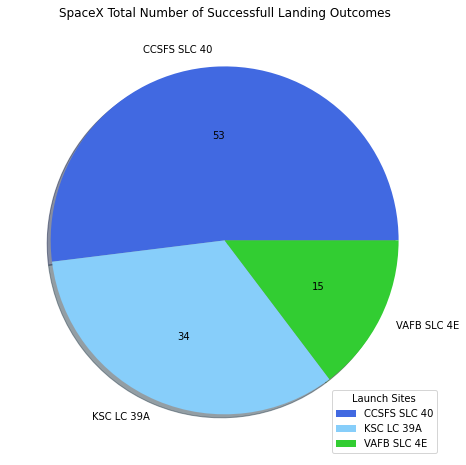

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(launch_count['Class_1'], labels=launch_count['LaunchSite'], shadow=True, autopct=lambda p: '{:.0f}'.format(p*(launch_count['Class_1'].sum())/100), colors=['royalblue','lightskyblue','limegreen'])
ax.legend(launch_count['LaunchSite'], title='Launch Sites')
ax.set_title('SpaceX Total Number of Successfull Landing Outcomes')
plt.show()

Print the landing outcome percentage for each launch site.

In [19]:
outcome_ratio = spacex_df.groupby('LaunchSite')['Class'].value_counts(normalize=True).unstack().reset_index()
outcome_ratio.columns = ['LaunchSite', 'Class_0', 'Class_1']
outcome_ratio

,LaunchSite,Class_0,Class_1
0,CCSFS SLC 40,0.302632,0.697368
1,KSC LC 39A,0.128205,0.871795
2,VAFB SLC 4E,0.166667,0.833333


Filter the launch site with best successful landing rate.

In [21]:
best_site = spacex_df[spacex_df['LaunchSite'] == 'KSC LC 39A']
best_site = best_site.groupby('LaunchSite')['Class'].value_counts(normalize=True).reset_index(name='Count')
best_site

,LaunchSite,Class,Count
0,KSC LC 39A,1,0.871795
1,KSC LC 39A,0,0.128205


Create a Pie Plot with the success rate for KSC Launch Site.

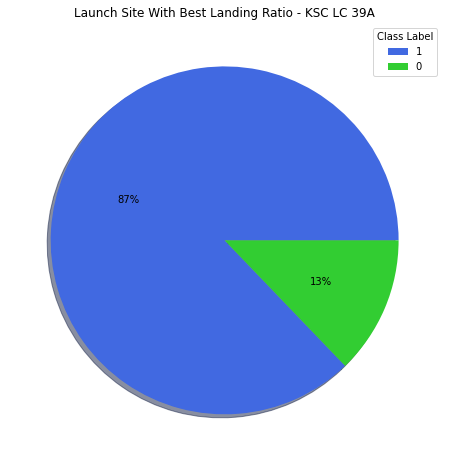

In [22]:
fig1, ax1 = plt.subplots(figsize=(8,8))
wedge = ax1.pie(best_site['Count'], autopct='%1.0f%%', shadow=True, colors=['royalblue','limegreen'])
ax1.legend(best_site['Class'], title='Class Label')
ax1.set_title('Launch Site With Best Landing Ratio - KSC LC 39A')
plt.show()

Total payload in kilograms launched into Space for NASA.

In [23]:
nasa_df = spacex_df.loc[spacex_df['Customer'].str.contains('NASA')]
nasa_payload = nasa_df['PayloadMass'].sum()
print(f'SpaceX launched into space a total payload of {nasa_payload} Kilograms on behalf of Nasa')

SpaceX launched into space a total payload of 129420.7 Kilograms on behalf of Nasa


Average payload weight launched into space using booster veersion v1.1.

In [24]:
v1_df = spacex_df.loc[spacex_df['Block_Version'].str.contains('v1.1')]
v1_payload_df = v1_df['PayloadMass'].mean().round(decimals=2)
print(f'SpaceX launched into space an average of {v1_payload_df} Kilograms per payload using the F9 v1.1 Booster')

SpaceX launched into space an average of 3848.17 Kilograms per payload using the F9 v1.1 Booster


Percentage of reused boosters.

In [27]:
class_1 = spacex_df[spacex_df['Class'] == 1]
reused_count = class_1['Reused'].value_counts(normalize=True)
reused_count

True     0.647059
False    0.352941
Name: Reused, dtype: float64

Create a DataFrame for the dashboard app with Plotly.

In [25]:
dash_df = wrangle_df[['FlightNumber', 'LaunchSite', 'Outcome', 'Class', 'PayloadMass', 'BoosterVersion', 'Block_Version']]
print(dash_df.shape)
dash_df.head()

(133, 7)


,FlightNumber,LaunchSite,Outcome,Class,PayloadMass,BoosterVersion,Block_Version
0,1,CCSFS SLC 40,None None,0,7457.0,Falcon 9,v1.0
1,2,CCSFS SLC 40,None None,0,525.0,Falcon 9,v1.0
2,3,CCSFS SLC 40,None None,0,677.0,Falcon 9,v1.0
3,4,VAFB SLC 4E,False Ocean,0,500.0,Falcon 9,v1.0
4,5,CCSFS SLC 40,None None,0,3170.0,Falcon 9,v1.0


In [28]:
project.save_data(data=dash_df.to_csv(index=False), file_name='spacex_launch_dash.csv', overwrite=True)

{'file_name': 'spacex_launch_dash.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'applieddatasciencecapstone-donotdelete-pr-jx5un88ldtszdu',
 'asset_id': 'bc9827fb-e1c2-45e4-a016-9377d574995b'}

In [29]:
project.save_data(data=api_df.to_csv(index=False), file_name='spacex_api.csv', overwrite=True)

{'file_name': 'spacex_api.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'applieddatasciencecapstone-donotdelete-pr-jx5un88ldtszdu',
 'asset_id': 'e3d9174d-7142-4ae0-a172-c58e7c0fbe08'}

YESS MUMMY!